# Skalierung von nummerischen Werten
## Initialisierung

In [26]:
from sklearn import preprocessing as pp
import pandas as pd

In [34]:
df = pd.DataFrame({'Werte':[-50,-5,20,50,100]}).astype(float)
columnData = pd.DataFrame(df["Werte"])
df

,Werte
0,-50.0
1,-5.0
2,20.0
3,50.0
4,100.0


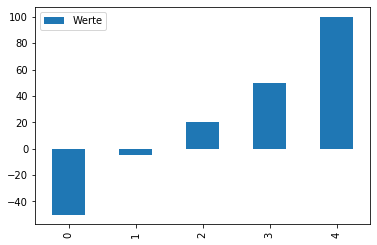

In [35]:
df.plot(kind='bar')

## Manuelle Skalierierung

In [36]:
normalisierung = lambda x: (x-x.min()) / (x.max() - x.min())
zentrierung = lambda x: (x-x.mean())
standardisierung = lambda x: (x-x.mean()) / x.std()

In [45]:
df2 = pd.DataFrame(df, copy=True)
df2["Normalisierung"] = columnData.pipe(normalisierung)
df2["Zentrierung"] = columnData.pipe(zentrierung)
df2["Standardisierung"] = columnData.pipe(standardisierung)
df2

,Werte,Normalisierung,Zentrierung,Standardisierung
0,-50.0,0.000000,-73.0,-1.291479
1,-5.0,0.300000,-28.0,-0.495362
2,20.0,0.466667,-3.0,-0.053074
3,50.0,0.666667,27.0,0.477670
4,100.0,1.000000,77.0,1.362245


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A001DC9D48>,
      dtype=object)

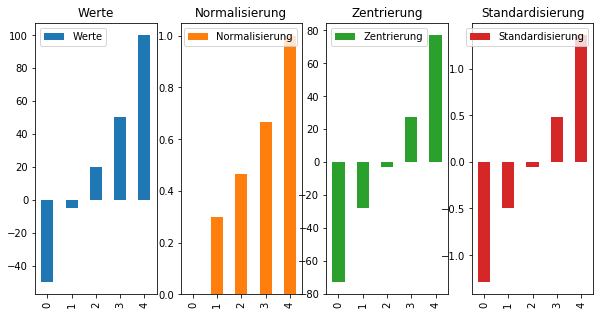

In [52]:
df2.plot(kind='bar', subplots=True, layout=(1,4), figsize=(10,5), )

## Skalierung mit SKLearn

In [0]:
df2 = pd.DataFrame(df, copy=True)
df2["StandardScaler"] = pp.StandardScaler().fit_transform(columnData)
df2["MinMaxScaler"] = pp.MinMaxScaler().fit_transform(columnData)
df2["MaxAbsScaler"] = pp.MaxAbsScaler().fit_transform(columnData)
df2["RobustScaler"] = pp.RobustScaler(with_centering=True, with_scaling=True).fit_transform(columnData)
df2["PowerTransformer"] = pp.PowerTransformer().fit_transform(columnData)
df2["QuantileTransformer"] = pp.QuantileTransformer().fit_transform(columnData)
df2["Normalizer"] = pp.Normalizer().fit_transform(columnData)
df2

In [0]:
df2.plot(kind='bar', subplots=True, layout=(3,3), figsize=(10,10))